# Read in JSON and Wrangle Format
It's a weird format so we need some adjustments before we can convert to DataFrame

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import json
  
# Opening JSON file
f = open('./src/functions/documentReader/topSectorWordsSectors.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [3]:
data

[{'Financial Institution': 'Financial Institution',
  'ABANCACorporacinBancariaS.txt': {'energy': 51,
   'environmental': 32.5378277861242,
   'management': 15.73553116878063,
   'party': 35.37153650105044,
   'buildings': 1.1823215567939547,
   'sustainability': 29.487406431175053},
  'ABN_AMRO_2015_External_review_report.txt': {'energy': 89,
   'environmental': 34.57144202275696,
   'management': 7.867765584390315,
   'party': 7.737523609604784,
   'buildings': 141.87858681527456,
   'sustainability': 39.655477614338864},
  'ABN_AMRO_2016_External Review report.txt': {'energy': 116,
   'environmental': 39.655477614338864,
   'management': 13.768589772683052,
   'party': 8.84288412526261,
   'buildings': 105.22661855466197,
   'sustainability': 37.621863377706106},
  'AfricaFinanceCorporation.txt': {'energy': 21,
   'environmental': 19.319335248011242,
   'management': 10.818177678536683,
   'party': 7.737523609604784,
   'buildings': 0,
   'sustainability': 17.28572101137848},
  'Ass

In [4]:
output_format=dict()
for d in data:
    # get sector
    for k in d.keys():
        if k[:-3]!="txt":
            sectorName = k
            break

    output_format[sectorName] = []
    for k in d.keys():
        if(k!=sectorName):
            new_object = d[k]
            new_object['companyName'] = k
            output_format[sectorName].append(new_object)

In [5]:
output_format

{'Financial Institution': [{'energy': 51,
   'environmental': 32.5378277861242,
   'management': 15.73553116878063,
   'party': 35.37153650105044,
   'buildings': 1.1823215567939547,
   'sustainability': 29.487406431175053,
   'companyName': 'ABANCACorporacinBancariaS.txt'},
  {'energy': 89,
   'environmental': 34.57144202275696,
   'management': 7.867765584390315,
   'party': 7.737523609604784,
   'buildings': 141.87858681527456,
   'sustainability': 39.655477614338864,
   'companyName': 'ABN_AMRO_2015_External_review_report.txt'},
  {'energy': 116,
   'environmental': 39.655477614338864,
   'management': 13.768589772683052,
   'party': 8.84288412526261,
   'buildings': 105.22661855466197,
   'sustainability': 37.621863377706106,
   'companyName': 'ABN_AMRO_2016_External Review report.txt'},
  {'energy': 21,
   'environmental': 19.319335248011242,
   'management': 10.818177678536683,
   'party': 7.737523609604784,
   'buildings': 0,
   'sustainability': 17.28572101137848,
   'companyN

This looks about right, let's see it as a dataframe

In [6]:
companies_df = pd.DataFrame.from_dict(
    output_format, orient='index'
).reset_index(
).melt(
    id_vars='index'
).drop(
    columns='variable'
).dropna(
).reset_index(
    drop=True
).rename(
    columns={'index':'sectorName'}
)
companies_df.head()

,sectorName,value
0,Financial Institution,"{'energy': 51, 'environmental': 32.53782778612..."
1,Corporate-Energy,"{'2015': 3.6865247172865425, 'energy': 137.831..."
2,Corporate-Infrastructure,"{'energy': 49.40415000324253, 'environmental':..."
3,Corporate-Real Estate,"{'energy': 59, 'environmental': 42, 'buildings..."
4,Corporate-Transportation,"{'environmental': 15, 'energy': 16.66838452665..."


Expand the JSON column so that keys are columns

In [7]:

pd.json_normalize(companies_df.value)

,energy,environmental,management,party,buildings,sustainability,companyName,2015,renewable,climate,...,expenditures,11,reviewed,eligibility,findings,efficiency,data,network,report,certification
0,51.000000,32.537828,15.735531,35.371537,1.182322,29.487406,ABANCACorporacinBancariaS.txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,137.831327,21.482780,NaN,24.013414,NaN,NaN,AC-Energy_External-Review-Report3.txt,3.686525,33.0,7.325640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49.404150,29.113160,38.817546,NaN,NaN,NaN,ACS-SCE_External Review Report.txt,NaN,NaN,12.351038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59.000000,42.000000,NaN,NaN,39.157864,10.000000,Activia Properties_External Review Report.txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.668385,15.000000,19.922841,0.000000,NaN,NaN,AeroportidiRomaS.txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,13.000000,209.462266,31.471062,6.632163,1.182322,9.151264,ToyotaFinanceCorporation(2020).txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,8.000000,50.840356,7.867766,6.632163,0.000000,23.386564,UBIBanca.txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,21.000000,35.588249,15.735531,36.476897,23.646431,18.302528,UBS.txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,53.000000,30.504214,8.851236,1.105361,41.381254,17.285721,VarbergsSparbank.txt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
companies_df.reset_index(drop=True)

,sectorName,value
0,Financial Institution,"{'energy': 51, 'environmental': 32.53782778612..."
1,Corporate-Energy,"{'2015': 3.6865247172865425, 'energy': 137.831..."
2,Corporate-Infrastructure,"{'energy': 49.40415000324253, 'environmental':..."
3,Corporate-Real Estate,"{'energy': 59, 'environmental': 42, 'buildings..."
4,Corporate-Transportation,"{'environmental': 15, 'energy': 16.66838452665..."
...,...,...
258,Financial Institution,"{'energy': 13, 'environmental': 209.4622663731..."
259,Financial Institution,"{'energy': 8, 'environmental': 50.840355915819..."
260,Financial Institution,"{'energy': 21, 'environmental': 35.58824914107..."
261,Financial Institution,"{'energy': 53, 'environmental': 30.50421354949..."


Melt and drop NA values for the format we want

In [9]:
final_df = companies_df.join(
    pd.json_normalize(companies_df.value)
).drop(
    columns='value'
).melt(
    id_vars=['sectorName', 'companyName']
).dropna()
final_df.head()

,sectorName,companyName,variable,value
0,Financial Institution,ABANCACorporacinBancariaS.txt,energy,51.000000
1,Corporate-Energy,AC-Energy_External-Review-Report3.txt,energy,137.831327
2,Corporate-Infrastructure,ACS-SCE_External Review Report.txt,energy,49.404150
3,Corporate-Real Estate,Activia Properties_External Review Report.txt,energy,59.000000
4,Corporate-Transportation,AeroportidiRomaS.txt,energy,16.668385


# Plotting Distributions

Set plot style and plot a single sector first

In [10]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

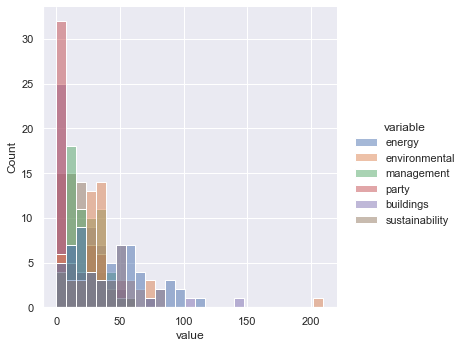

In [11]:
sns.displot(data=final_df.query('sectorName == "Financial Institution"'), x='value', hue='variable')

Stripplot seems more useful here

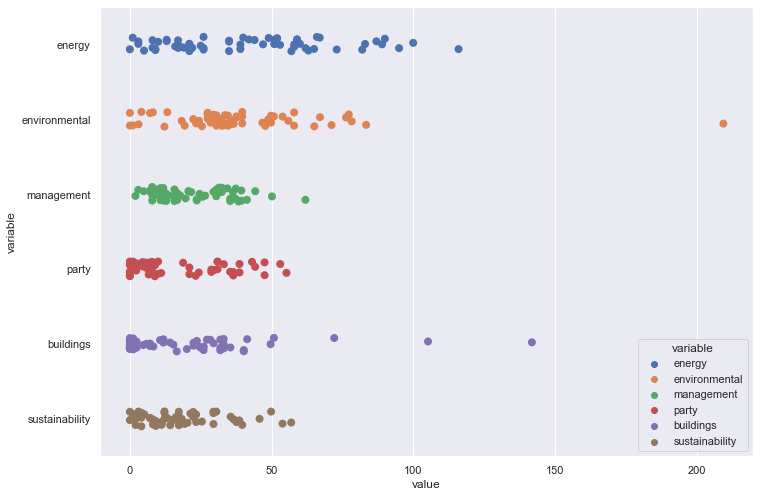

In [12]:
sns.stripplot(data=final_df.query('sectorName == "Financial Institution"'), x='value', y='variable', hue='variable', size=8)

Violinplot for every sector

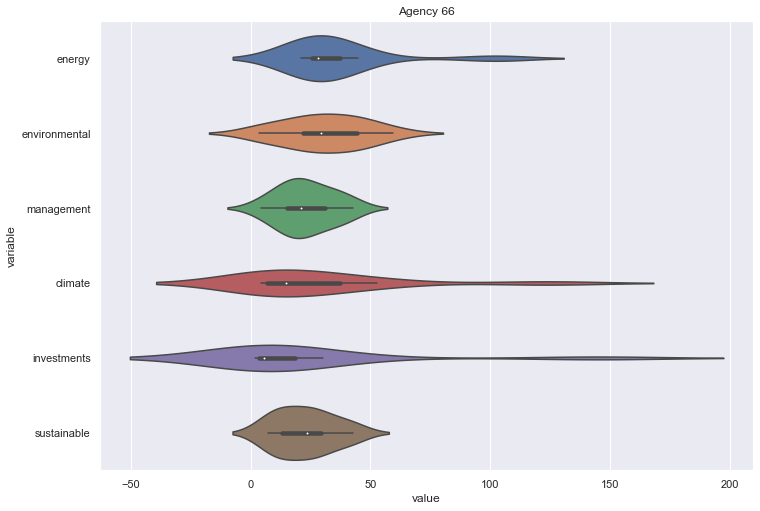

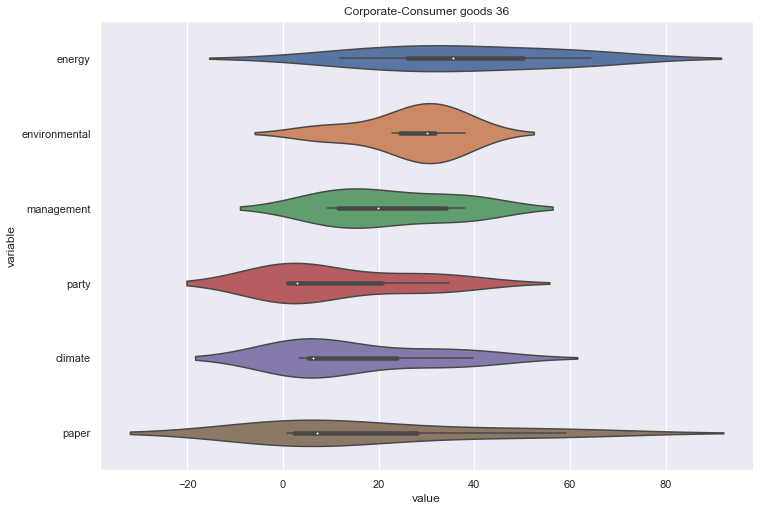

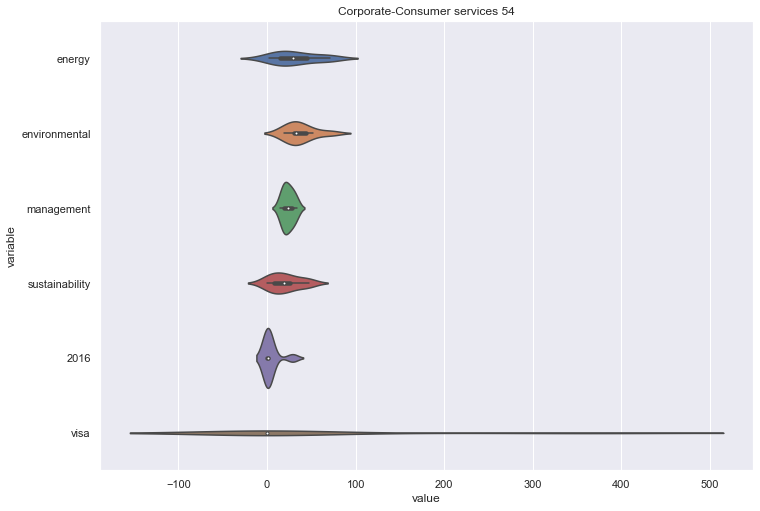

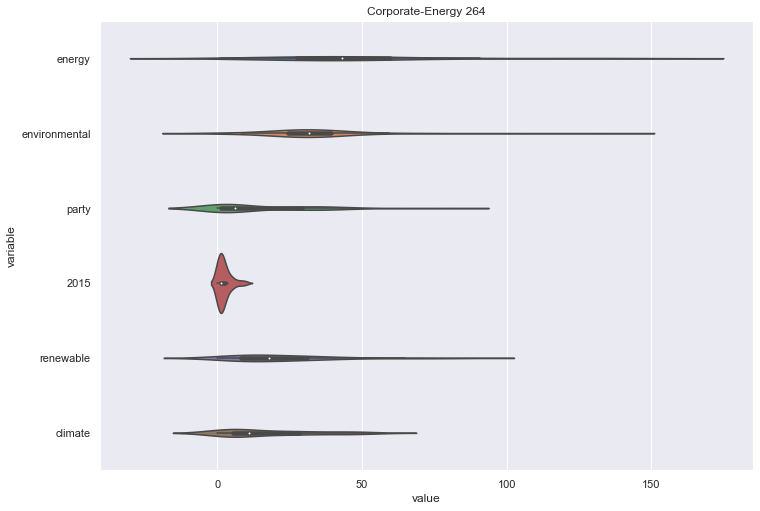

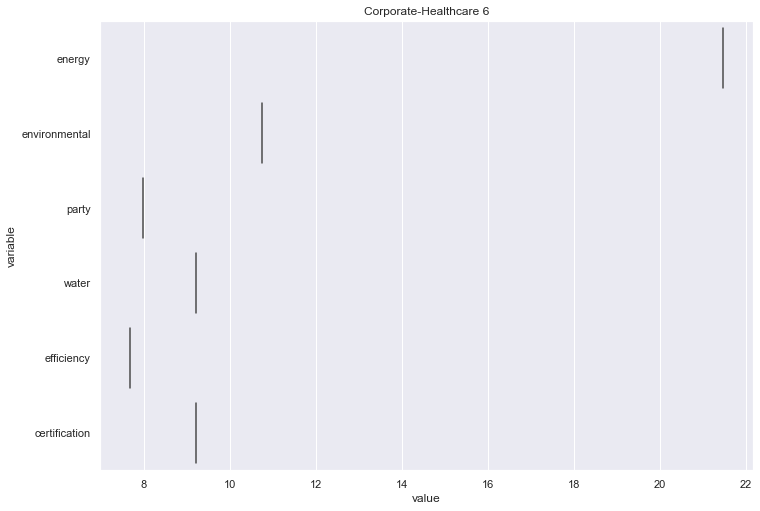

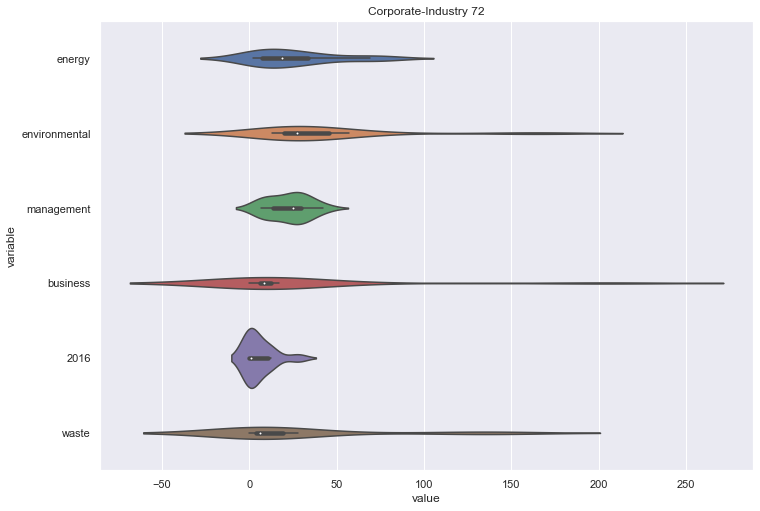

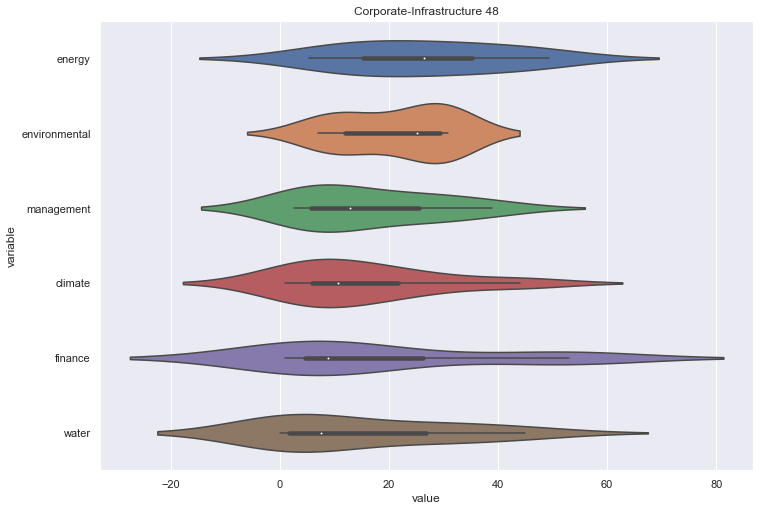

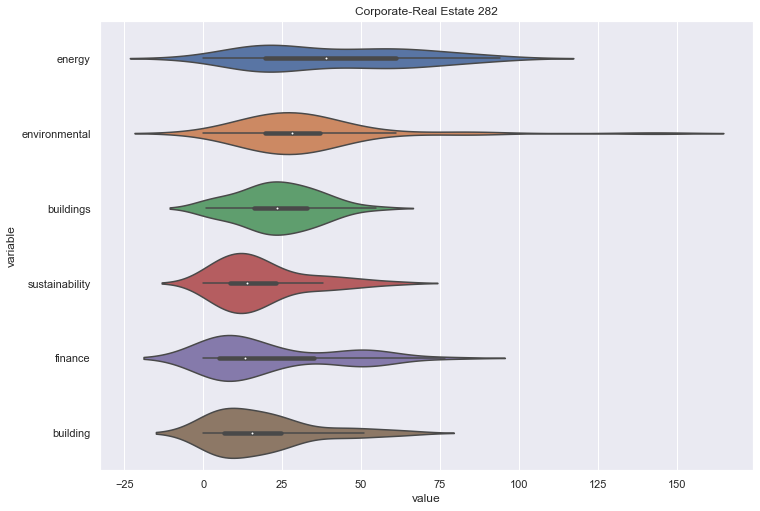

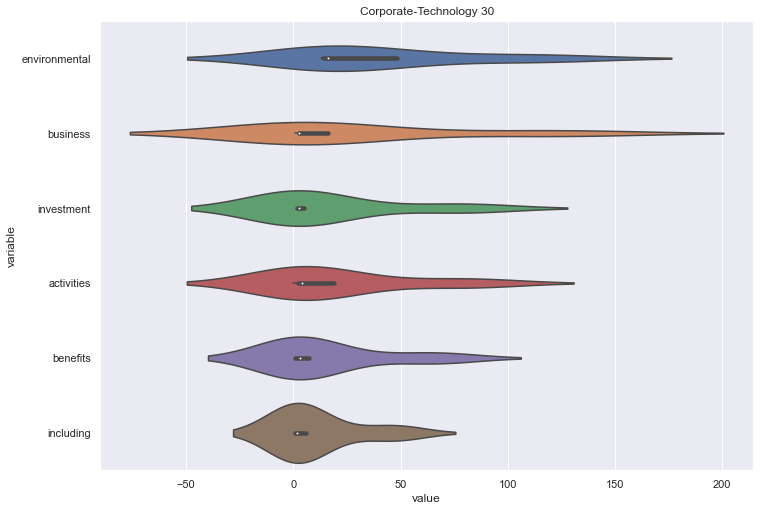

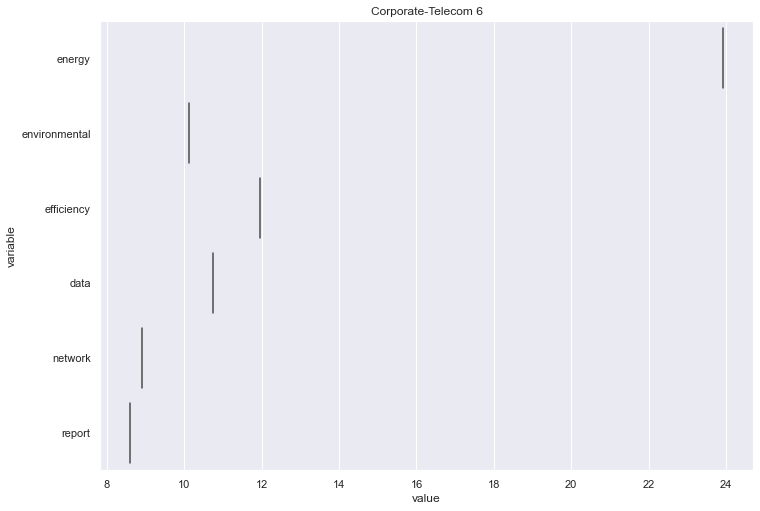

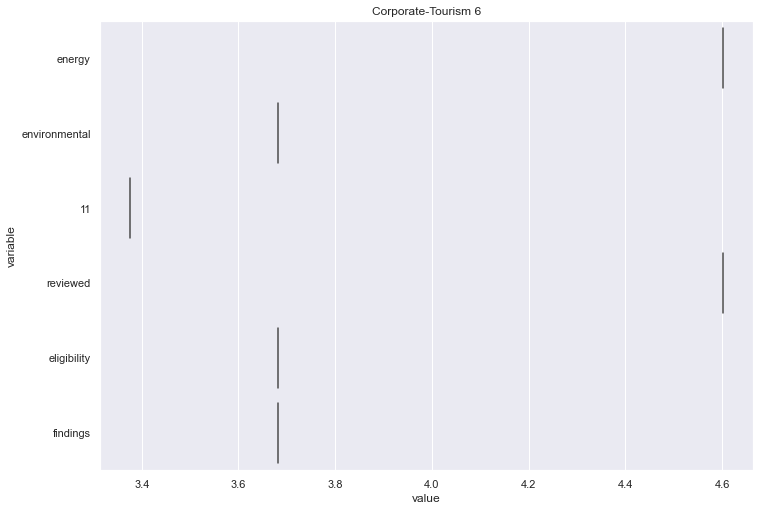

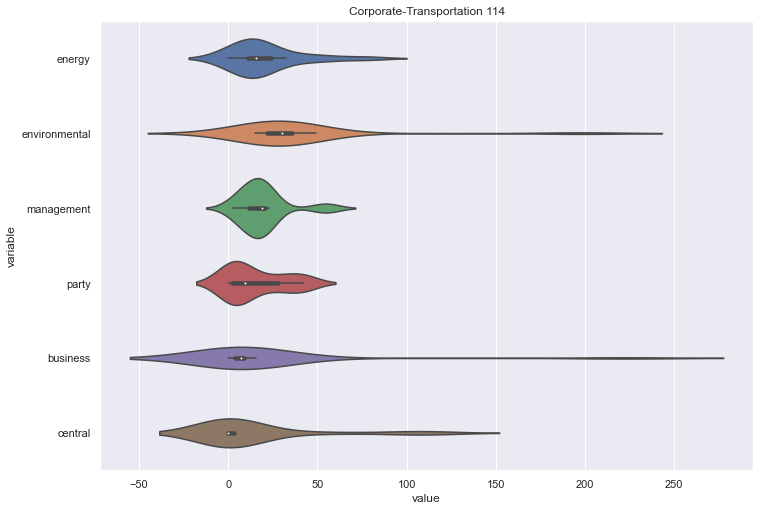

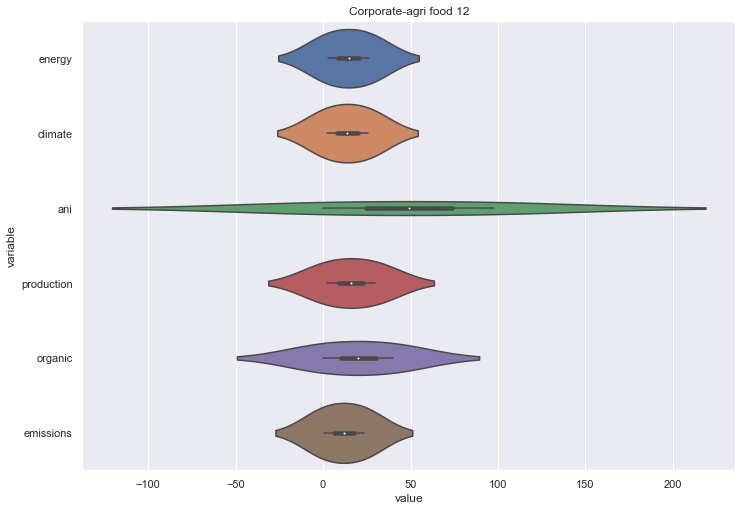

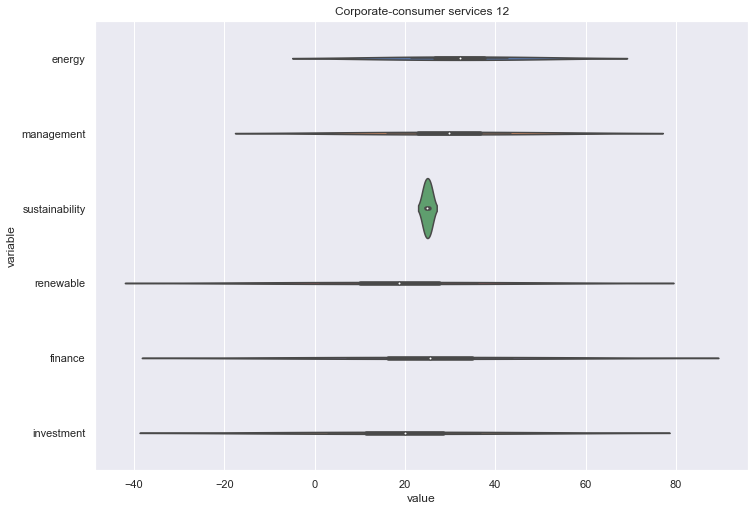

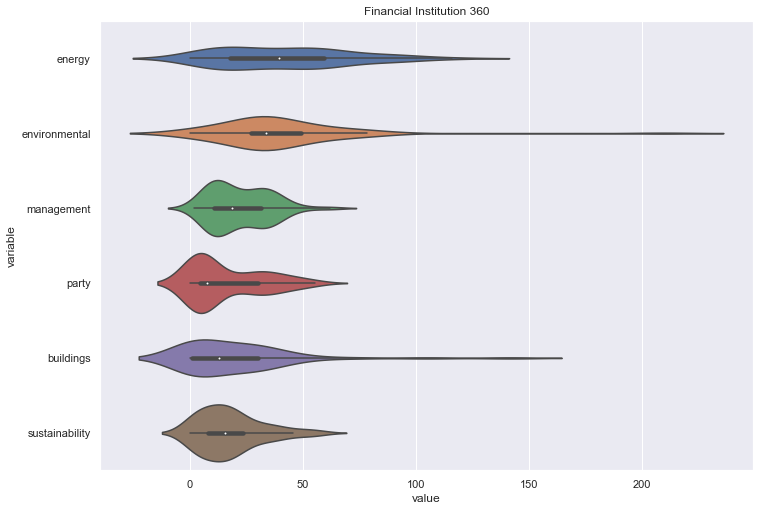

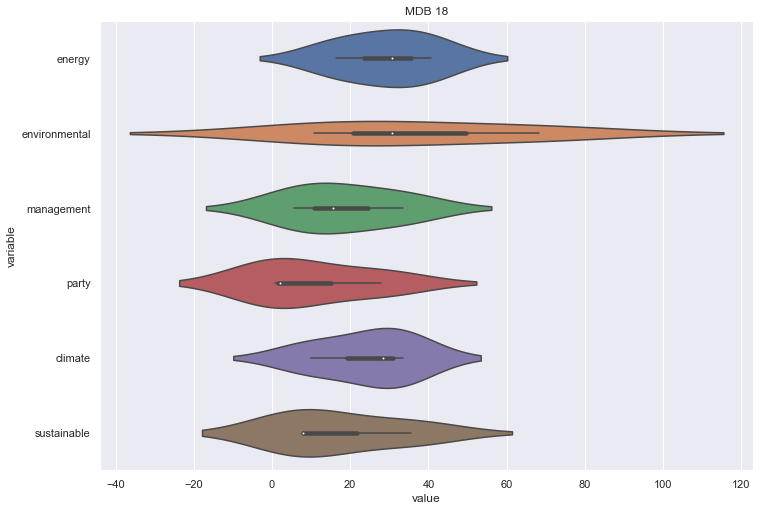

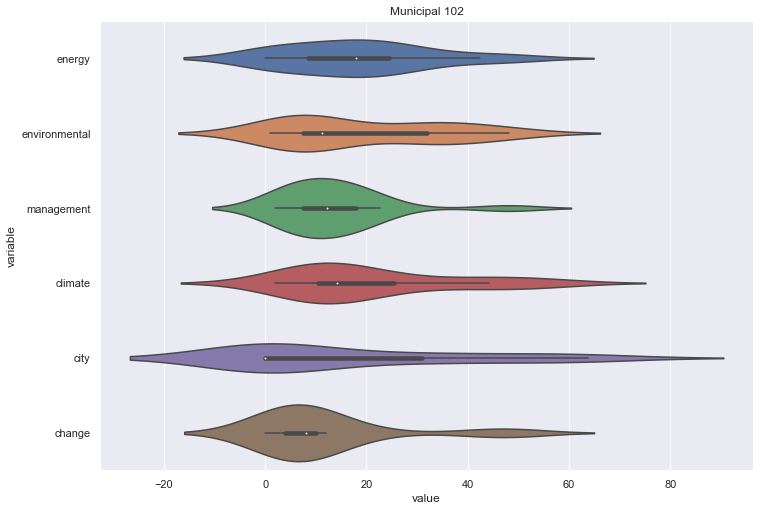

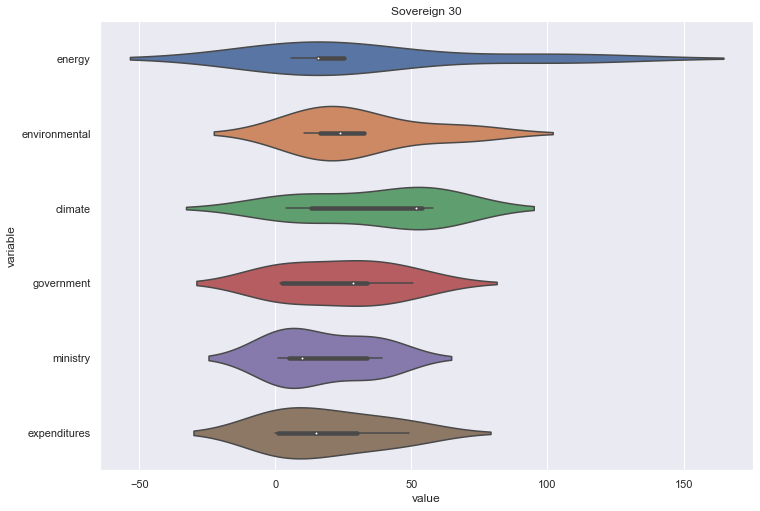

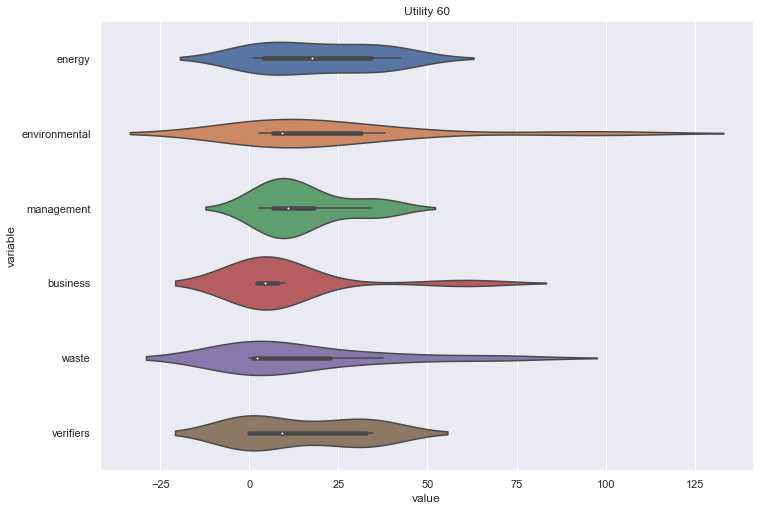

In [13]:
sector_groups = final_df.groupby('sectorName')
import matplotlib.pyplot as plt
for sname, sgroup in sector_groups:
    plt.figure()
    sns.violinplot(data=sgroup, x='value', y='variable').set(title=f"{sname} {len(sgroup.index)}")

# Normalisation Options
How should we normalise? It looks like just removing outliers then linear transform would be enough. Let's see.

Work on one sector to test:

In [14]:
financial_institutions = final_df.query('sectorName == "Financial Institution"')
financial_institutions.head()

,sectorName,companyName,variable,value
0,Financial Institution,ABANCACorporacinBancariaS.txt,energy,51.0
19,Financial Institution,ABN_AMRO_2015_External_review_report.txt,energy,89.0
35,Financial Institution,ABN_AMRO_2016_External Review report.txt,energy,116.0
49,Financial Institution,AfricaFinanceCorporation.txt,energy,21.0
62,Financial Institution,AssicurazioniGenerali.txt,energy,62.0


In [15]:
# 90th Percentile
def q90(x):
    return x.quantile(0.9)

Aggregate by variable then calculate min and 90th percentile

In [16]:
max_qs = financial_institutions[['variable', 'value']].groupby('variable').agg(
[q90, min]
).reset_index()
max_qs

variable      value          
                         q90       min
0       buildings  40.317165  0.000000
1          energy  83.400000  0.000000
2   environmental  67.515993  0.000000
3      management  38.453704  1.966941
4           party  39.129762  0.000000
5  sustainability  37.723544  0.000000

Merge back into original data frame

In [17]:
normal = financial_institutions.merge(max_qs, left_on='variable', right_on='variable')
normal.head()

C:\Users\Millie\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Millie\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,sectorName,companyName,variable,value,"(value, q90)","(value, min)"
0,Financial Institution,ABANCACorporacinBancariaS.txt,energy,51.0,83.4,0.0
1,Financial Institution,ABN_AMRO_2015_External_review_report.txt,energy,89.0,83.4,0.0
2,Financial Institution,ABN_AMRO_2016_External Review report.txt,energy,116.0,83.4,0.0
3,Financial Institution,AfricaFinanceCorporation.txt,energy,21.0,83.4,0.0
4,Financial Institution,AssicurazioniGenerali.txt,energy,62.0,83.4,0.0


Calculate normalised value and clip to 1.0

In [18]:
normal['normalised_value'] = (normal['value'] - normal[('value', 'min')])/(normal[('value', 'q90')] - normal[('value','min')])

In [19]:
normal['normalised_value'] = normal['normalised_value'].clip(upper=1)

Draw the same stripplot.

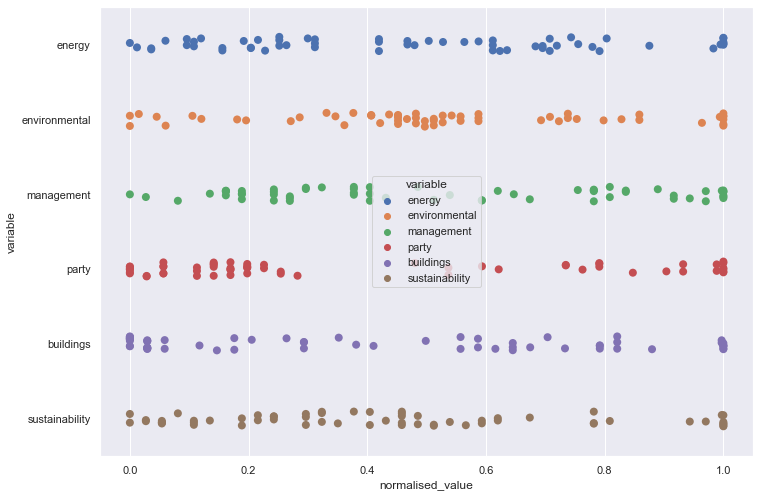

In [20]:
sns.stripplot(data=normal, x='normalised_value', y='variable', hue='variable', size=8)

Distribution looks much more even now.

# Calculate Sector Averages

In [23]:
final_df.head()

,sectorName,companyName,variable,value
0,Financial Institution,ABANCACorporacinBancariaS.txt,energy,51.000000
1,Corporate-Energy,AC-Energy_External-Review-Report3.txt,energy,137.831327
2,Corporate-Infrastructure,ACS-SCE_External Review Report.txt,energy,49.404150
3,Corporate-Real Estate,Activia Properties_External Review Report.txt,energy,59.000000
4,Corporate-Transportation,AeroportidiRomaS.txt,energy,16.668385


In [26]:
max_qs = final_df[['sectorName', 'variable', 'value']].groupby(['sectorName', 'variable']).agg(
[q90, min]
).reset_index()
max_qs

sectorName       variable      value           
                                     q90        min
0       Agency        climate  52.953340   4.564943
1       Agency         energy  44.736443  20.998738
2       Agency  environmental  45.649431   3.651954
3       Agency    investments  30.128625   1.825977
4       Agency     management  36.519545   4.564943
..         ...            ...        ...        ...
109    Utility         energy  38.449317   0.904690
110    Utility  environmental  43.877456   2.714069
111    Utility     management  34.649620   2.714069
112    Utility      verifiers  34.748989   0.000000
113    Utility          waste  40.677267   0.000000

[114 rows x 4 columns]

In [27]:
normal = final_df.merge(max_qs, left_on=['sectorName', 'variable'], right_on=['sectorName', 'variable'])

C:\Users\Millie\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Millie\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [28]:
normal.head()

,sectorName,companyName,variable,value,"(value, q90)","(value, min)"
0,Financial Institution,ABANCACorporacinBancariaS.txt,energy,51.0,83.4,0.0
1,Financial Institution,ABN_AMRO_2015_External_review_report.txt,energy,89.0,83.4,0.0
2,Financial Institution,ABN_AMRO_2016_External Review report.txt,energy,116.0,83.4,0.0
3,Financial Institution,AfricaFinanceCorporation.txt,energy,21.0,83.4,0.0
4,Financial Institution,AssicurazioniGenerali.txt,energy,62.0,83.4,0.0


In [29]:
normal['normalised_value'] = (normal['value'] - normal[('value', 'min')])/(normal[('value', 'q90')] - normal[('value','min')])
normal['normalised_value'] = normal['normalised_value'].clip(upper=1)
normal.head()

,sectorName,companyName,variable,value,"(value, q90)","(value, min)",normalised_value
0,Financial Institution,ABANCACorporacinBancariaS.txt,energy,51.0,83.4,0.0,0.611511
1,Financial Institution,ABN_AMRO_2015_External_review_report.txt,energy,89.0,83.4,0.0,1.000000
2,Financial Institution,ABN_AMRO_2016_External Review report.txt,energy,116.0,83.4,0.0,1.000000
3,Financial Institution,AfricaFinanceCorporation.txt,energy,21.0,83.4,0.0,0.251799
4,Financial Institution,AssicurazioniGenerali.txt,energy,62.0,83.4,0.0,0.743405


In [41]:
sectors_df = normal[['sectorName', 'variable', 'normalised_value']].groupby(['sectorName', 'variable']).mean().reset_index()
sectors_df

,sectorName,variable,normalised_value
0,Agency,climate,0.373928
1,Agency,energy,0.437063
2,Agency,environmental,0.618577
3,Agency,investments,0.337243
4,Agency,management,0.563636
...,...,...,...
109,Utility,energy,0.480723
110,Utility,environmental,0.365934
111,Utility,management,0.380453
112,Utility,verifiers,0.430435


In [47]:
sectors_df.to_json(orient='values')

'[["Agency","climate",0.3739279588],["Agency","energy",0.4370629371],["Agency","environmental",0.6185770751],["Agency","investments",0.3372434018],["Agency","management",0.5636363636],["Agency","sustainable",0.4675324675],["Corporate-Consumer goods","climate",0.3468468468],["Corporate-Consumer goods","energy",0.5206489676],["Corporate-Consumer goods","environmental",0.6746031746],["Corporate-Consumer goods","management",0.4558823529],["Corporate-Consumer goods","paper",0.3364197531],["Corporate-Consumer goods","party",0.3333333333],["Corporate-Consumer services","2016",0.2186379928],["Corporate-Consumer services","energy",0.455168305],["Corporate-Consumer services","environmental",0.4476495726],["Corporate-Consumer services","management",0.5307328605],["Corporate-Consumer services","sustainability",0.4510400812],["Corporate-Consumer services","visa",0.1111111111],["Corporate-Energy","2015",0.3977272727],["Corporate-Energy","climate",0.3823710074],["Corporate-Energy","energy",0.49607121